# Initial Exploration - IPR of Basic Research


## Purpose
The purpose of the proposed research is to o investigate the impact of retaining or not intellectual property rights (IPR) of basic research in one country on the dynamics of growth in a two-countries setup. In this initial exploration of the topic, the first part is to provide some suggestive empirical evidence about flow of basic research and diffusion in- and out- of Canada. The second part is to leverage simulation techniques to model the basic setup.

## Data Exploration
The data exploration leverages Derwent Innovation Database that lists all patents application worldwide. The data has been cleaned through machine learning techniques. In addition, indicators such as combined patent impact and counts of forward citation are provided.

This first query looks into all applications that have applicants or inventors name listed as UNIV or Institute, and that applications originated in US and Canada. This has the purpose to segment the dataset to patent applications applied for by public institutions.

Query: AC=(CA OR US) AND PAOC=(CA OR US) AND (IN=(UNIV OR Institute) OR PA=(UNIV OR Institute))

In [74]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [75]:
# limit of 60k result per patch therefore the requirement is to segment the data

# first patch 1700 - 2000 inclusively 
# The overall trend shows that the number has been rising quickly especially after 2010s
df_2000 = pd.read_csv('~/Derwent-Data/PublicData1700_2000.csv')

C:\Users\zhangyy\AppData\Local\Temp\1\ipykernel_20628\1174523563.py:5: DtypeWarning:

Columns (9,10,11,12,13,14,16,17,19,20,21,22,23,26,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.



In [76]:
# Get info on the table
print(df_2000.columns) # column names
df_2000.shape #44 columns and 52097 rows 

Index(['Publication Number', 'Title', 'Title - DWPI', 'Priority Number',
       'Priority Number - DWPI', 'Priority Date', 'Application Number',
       'Application Date', 'Publication Date', 'Estimated Expiration Date',
       'Estimated Expiration Date Factors - Disclaimer',
       'Estimated Expiration Date Factors - Estimated Earliest Effective Filing Date',
       'Estimated Expiration Date Factors - Estimated Terminal Disclaimer Prior Patent',
       'Estimated Expiration Date Factors - Terminal Disclaimer Earliest Estimated Filing Date ',
       'Estimated Expiration Date Factors - Terminal Disclaimer Prior Patent Expiration Date',
       'Estimated Expiration Date Factors - 35 U.S.C. Patent Term Adjustment',
       'Estimated Expiration Date Factors - 35 USC 156 Definitive Date ',
       'Estimated Expiration Date Factors - Publication Date',
       'Estimated Expiration Date Factors - Term of Design',
       'Estimated Expiration Date Factors - Post-grant Patent Term Adjustmen

(52097, 44)

In [77]:
# Initial data exploration, I am only interested in 
# "Inventor - w/address" and "Count of Cited Refs - Patent" "Reassignment (US)" and "Application Date" and "Priority NUmber"

In [78]:
df_2000_seg = df_2000[['Application Date', 'Priority Number', 'Inventor Count', 'Inventor - w/address', 'Count of Cited Refs - Patent', 'Assignee/Applicant', 'Inventor', 'Reassignment (US)']]

In [79]:
df_2000_seg['Application Date'] = pd.to_datetime(df_2000_seg['Application Date'], errors='coerce') #wrong format will become NA

C:\Users\zhangyy\AppData\Local\Temp\1\ipykernel_20628\2412286660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
df_2000_seg['year'] = df_2000_seg['Application Date'].dt.year

C:\Users\zhangyy\AppData\Local\Temp\1\ipykernel_20628\3156584494.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
len(df_2000_seg['year']) == len(df_2000) # all cells have a valid date and year

True

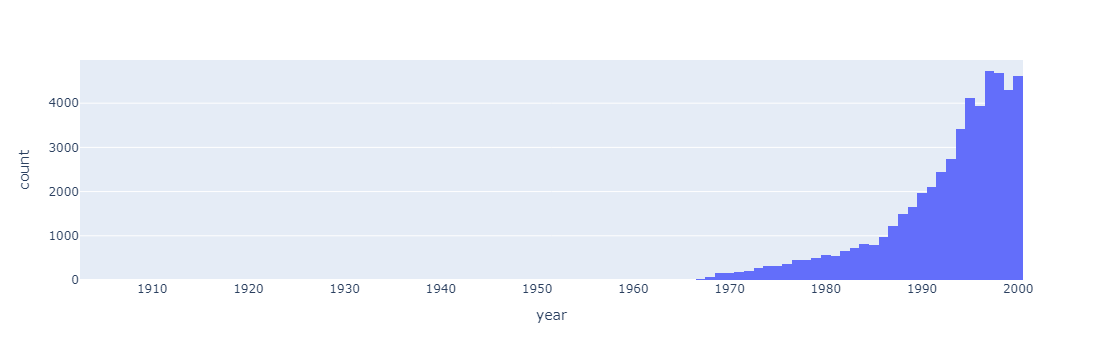

In [82]:
# Annual number of counts 

fig = px.histogram(df_2000_seg, x='year') 
fig.show()

In [83]:
# number citations
np.mean(df_2000_seg['Count of Cited Refs - Patent']) #maybe compared against non-public patent


5.745857414412166

### Innovation efficiency and country size

In the example, innovation efficiency is provided by WIPO. It is the capacity to translate innovation input (human capital, R&D ecosystem and domestic market sophisfication) into intangible assets and creative output. Canada is doing less well in innovation efficiency in relation to its innovation inputs. 


Adding ECI index

In [84]:
# read files

gdp_2008 = pd.read_csv('~/Derwent-Data/gii/gdp.csv')
gii_efficiency = pd.read_csv('~/Derwent-Data/gii/gii.csv', skip_blank_lines=True)
eci = pd.read_csv('~/Derwent-Data/gii/eci.csv', skip_blank_lines=True)

In [85]:
# rename column
gii_efficiency=gii_efficiency.rename(columns = {'Economy ISO3':'Country Code'})

In [86]:
# inner merge on country code
df = pd.merge(gdp_2008, gii_efficiency, on="Country Code")

In [87]:
df = pd.merge(df, eci, on="Economy Name")

In [88]:
df = df.rename(columns = {'2018':'gii', '2018_y':'eci'})

In [89]:
df

,Country Code,gdp,pop,OECD,G7,Economy Name,gii,eci,Country ID
0,ALB,1.515642e+10,2947314.0,NaN,NaN,Albania,0.4,NaN,eualb
1,ARE,4.270000e+11,6988685.0,NaN,NaN,United Arab Emirates,0.5,-0.13666,asare
2,ARG,5.250000e+11,40273769.0,NaN,NaN,Argentina,0.5,0.46674,saarg
3,ARM,1.245794e+10,2983421.0,NaN,NaN,Armenia,0.8,NaN,asarm
4,AUS,1.430000e+12,21249199.0,1.0,NaN,Australia,0.6,0.24368,ocaus
...,...,...,...,...,...,...,...,...,...
98,USA,2.070000e+13,304093966.0,1.0,1.0,United States,0.8,1.45592,nausa
99,VNM,3.100000e+11,85597241.0,NaN,NaN,Vietnam,0.8,-0.37778,asvnm
100,ZAF,4.050000e+11,50565812.0,NaN,NaN,South Africa,0.6,0.56007,afzaf
101,ZMB,2.631151e+10,12852966.0,NaN,NaN,Zambia,0.5,-0.43576,afzmb


In [90]:
# normalize gdp to share over richest country
df['gdp'] = df['gdp']/ df['gdp'].abs().max()  
df['pop'] = df['pop']/ df['pop'].abs().max()  
#df = df.dropna()

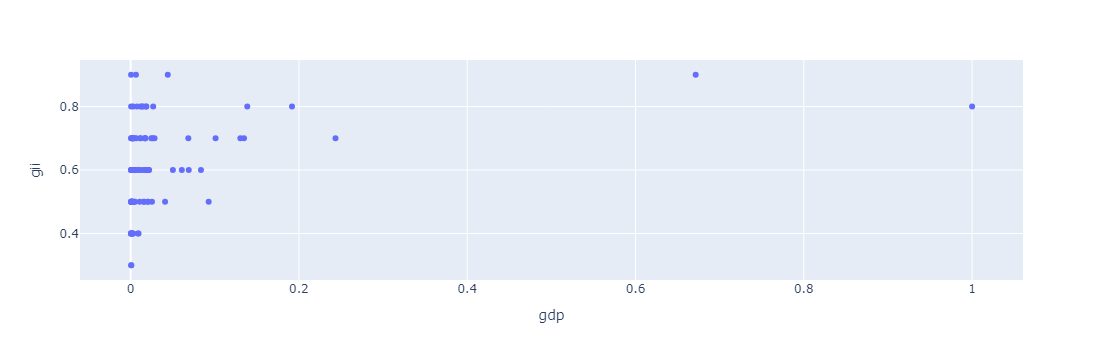

In [91]:
# regress
fig = px.scatter(df, x='gdp', y='gii') 
fig.show() #Larger economy is associated with better innovation efficiency and nothing can be said about smaller economies

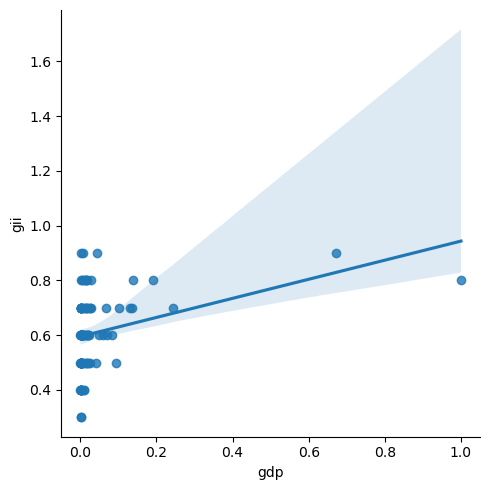

In [92]:
# plot over gdp
sns.lmplot(x='gdp',y='gii',data=df)

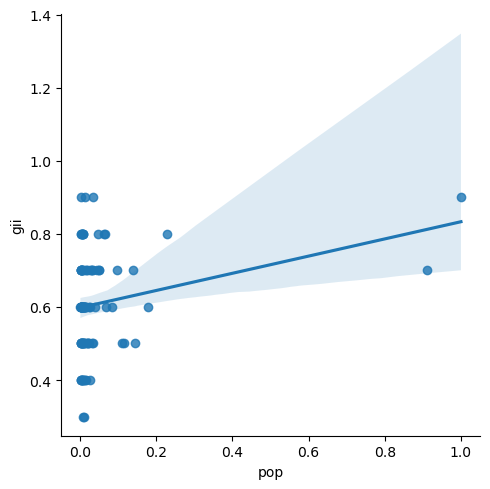

In [93]:
# plot over population
sns.lmplot(x='pop',y='gii',data=df)

In [94]:
large_economy = df[df['gdp']<0.3] #large economies?

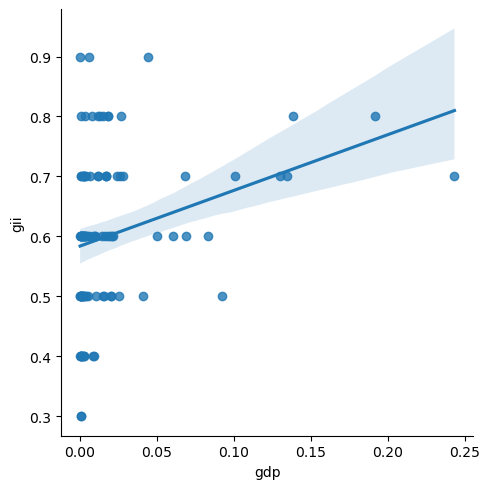

In [95]:
# plot over gdp for economies excluding US and China
sns.lmplot(x='gdp',y='gii',data=large_economy)

In [96]:
df['economy_size'] = pd.qcut(df.gdp,
                     4,
                     labels=[0, 1, 2, 3])

<Axes: xlabel='economy_size', ylabel='gii'>

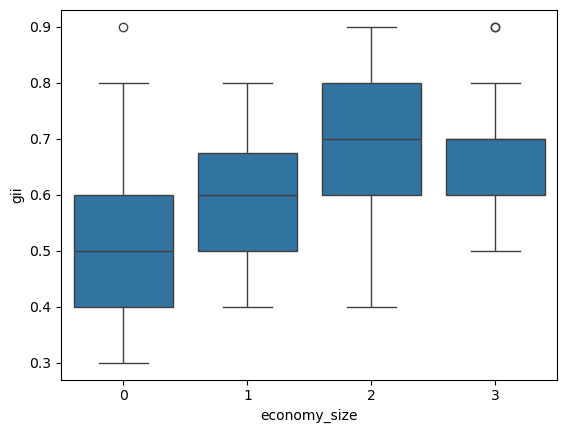

In [97]:
# group economies into quartile 
sns.boxplot(x='economy_size',y='gii',data=df)

In [98]:
df['popcapita'] = df['gdp']/ df['pop']

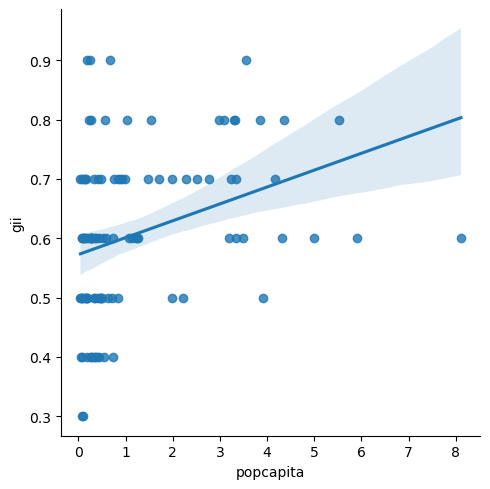

In [99]:
# plot over gdp per capita
sns.lmplot(x='popcapita',y='gii',data=df)

In [100]:
# segment to OECD and G7 countries

open_economy = df[(df['OECD'])==1]
open_economy = open_economy[(open_economy['gdp'])<0.2]

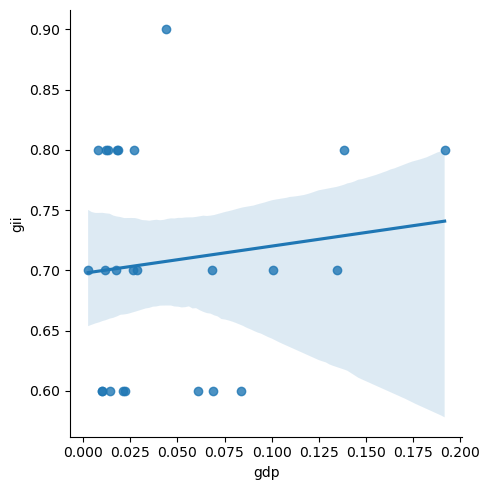

In [101]:
sns.lmplot(x='gdp',y='gii',data=open_economy) # plot looks bizarre

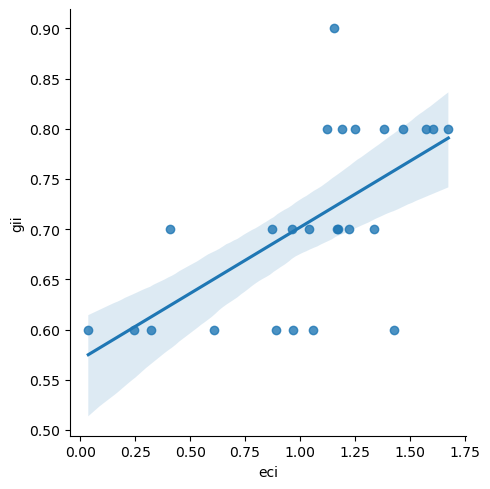

In [102]:
sns.lmplot(x='eci',y='gii',data=open_economy)

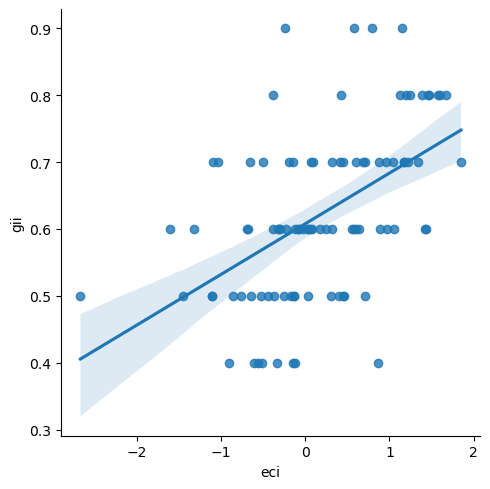

In [103]:
sns.lmplot(x='eci',y='gii',data=df)

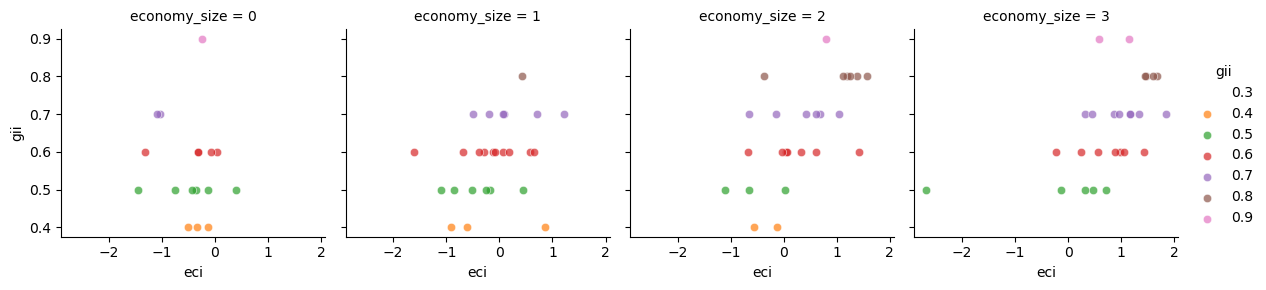

In [104]:
g = sns.FacetGrid(df, col="economy_size", hue="gii")
g.map(sns.scatterplot, "eci", "gii", alpha=.7)
g.add_legend()

### Ordinal Logit Model and Decision Trees

Because the dependent variable gii is categorical, the relationship here is not so strong. Attempts to evaluate with Ordinal logit model and Decision tree follows.

In [105]:
# remove rows without values for eci. We have the number of data points for the model
df_model = df.dropna(subset=['gii', 'eci', 'gdp'])
len(df_model)

94

In [106]:
# Ordinal Logit Model

import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split

X = df_model[['eci', 'gdp']]
Y = df_model['gii']

# Fit an Ordinal Logistic Regression Model
mod = OrderedModel(Y, X, distr='logit')

# Fit the model
res = mod.fit(method='bfgs')

# Print the model summary
print(res.summary())

# Likelihood ratio test for overall model significance
ll_null = res.llnull  # Log-likelihood of the null model
ll_full = res.llf     # Log-likelihood of the full model

# Compute the likelihood ratio test statistic
LR_stat = -2 * (ll_null - ll_full)

# Degrees of freedom (number of predictors)
df = X.shape[1]

from scipy import stats
# Compute p-value from chi-square distribution
p_value = stats.chi2.sf(LR_stat, df)

print(f"\nLikelihood Ratio Test Statistic: {LR_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Optimization terminated successfully.
         Current function value: 1.458190
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                             OrderedModel Results                             
Dep. Variable:                    gii   Log-Likelihood:                -137.07
Model:                   OrderedModel   AIC:                             288.1
Method:            Maximum Likelihood   BIC:                             305.9
Date:                Tue, 22 Oct 2024                                         
Time:                        14:45:18                                         
No. Observations:                  94                                         
Df Residuals:                      87                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

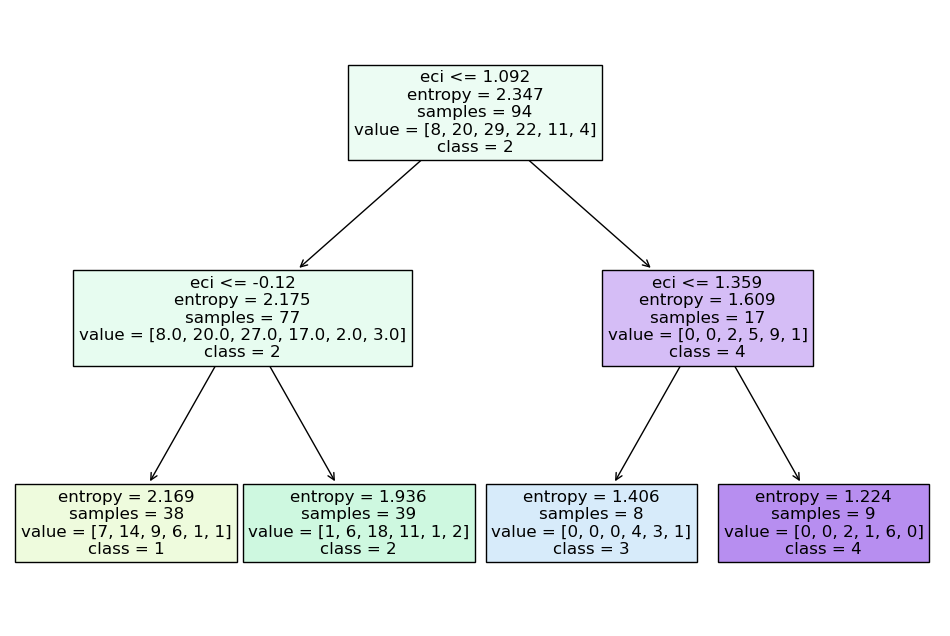

In [134]:
# Decision Tree Model
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Decision Tree only takes categorical values
Y = df_model['gii'].astype('category').cat.codes

# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

# Fit the model
clf.fit(X, Y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['eci', 'gdp'], class_names=["0", "1", "2", "3", "4", "5"], filled=True, fontsize=12)
plt.show()